## <center>  Секрет богатства

** В этом задании поработаем с данными о переписи населения [Adult](https://archive.ics.uci.edu/ml/datasets/Adult). **

<img src="http://memesmix.net/media/created/76upq4.jpg" width=600px/>


Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [1]:
import pandas as pd
import numpy as np

In [14]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, sep=", ")

C:\Users\Lida\AppData\Local\Temp\ipykernel_5248\1827062682.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, sep=", ")


In [15]:
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", \
               "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]

In [16]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько женщин и сколько мужчин (признак *sex*) представлено в этом датасете?** 

- а) 21790 женщин and 10771 мужчин
- б) 16346 мужчин and 12532 женщин
- в) 21790 мужчин and 10771 женщин
- г) 16346 женщин and 12532 мужчин

In [42]:
# You code here
male = data.query("sex == 'Male'")['sex'].count()
female = data.query("sex == 'Female'")['sex'].count()
print(f'B этом датасете представлено {male} мужчин and {female} женщин')


B этом датасете представлено 21790 мужчин and 10771 женщин


**2. Какой средний возраст женщин (признак *age*)?**

- а) 34.67
- б) 35.95
- в) 36.86
- г) 37.04

In [47]:
# Your code here
female = round(data.query("sex=='Female'")['age'].mean(), 2)
print(f'Cредний возраст женщин в этом датасете равен {female}')

Cредний возраст женщин в этом датасете равен 36.86


**3. Какой процент граждан Германии (признак *native-country*)?**

- а) 1.13
- б) 0.42
- в) 1.42
- г) 0.36

In [65]:
# Your code here
percent_germany = round((data[data['native-country'] == 'Germany']['native-country'].count() / data['native-country'].count() * 100), 2)
print(f'В нашем датасете процент граждан Германии составляет {percent_germany}')

В нашем датасете процент граждан Германии составляет 0.42


**4-5. Найдите математическое ожидание и стандартное отклонение возрата тех, кто зарабатывает больше 50 тысяч в год (признак *salary*) и тех, кто зарабатывает меньше 50 тычяч в год?**

Больше: 
- а) 45 +- 9.5 лет
- б) 42 +- 11.5 лет
- в) 41 +- 12.5 лет
- г) 44 +- 10.5 лет

Меньше:
- а) 37 +- 14 лет
- б) 38 +- 14 лет
- в) 39 +- 15 лет
- г) 40 +- 15 лет

In [107]:
# Your code here
avg_salary_max = int(data[data['salary'] == '>50K'].groupby(data['salary'] == '>50K')['age'].mean())
std_salary_max = float(round(data[data['salary'] == '>50K'].groupby(data['salary'] == '>50K')['age'].std(), 1))
avg_salary_min = int(data[data['salary'] == '<=50K'].groupby(data['salary'] == '>50K')['age'].mean())
std_salary_min = float(round(data[data['salary'] == '<=50K'].groupby(data['salary'] == '>50K')['age'].std(), 1))
print(f'Mатематическое ожидание и стандартное отклонение возрата тех, кто зарабатывает больше 50 тысяч в год {avg_salary_max} +- {std_salary_max}')
print(f'Mатематическое ожидание и стандартное отклонение возрата тех, кто зарабатывает меньше 50 тысяч в год {avg_salary_min} +- {std_salary_min}')

Mатематическое ожидание и стандартное отклонение возрата тех, кто зарабатывает больше 50 тысяч в год 44 +- 10.5
Mатематическое ожидание и стандартное отклонение возрата тех, кто зарабатывает меньше 50 тысяч в год 36 +- 14.0


**6. Правда ли, что те, кто зарабатывает больше 50 тысяч в год имеют по меньшей мере законченное школьное образование**

- а) Да
- б) Нет

In [231]:
# You code here
df = data[data['salary'] == '>50K'].groupby('education', as_index=False)['salary'].count().sort_values(by=['salary'])
min_education = df.loc[3, 'education']
print(f'Tе, кто зарабатывает больше 50 тысяч в год имеют по меньшей мере {min_education} класса образования')

Tе, кто зарабатывает больше 50 тысяч в год имеют по меньшей мере 1st-4th класса образования


**7. Выведите статистику для каждой расы (признак *race*) и каждого пола. Используйте *groupby()* и *describe()*. Найдите максимальый возраст представителя расы*Amer-Indian-Eskimo*.**

- а) 78
- б) 82
- в) 87
- г) 88



In [189]:
# You code here
max_age = int(data[data['race'] == 'Amer-Indian-Eskimo'].groupby(data['race'] == 'Amer-Indian-Eskimo')['age'].max())
print(f'Mаксимальый возраст представителя расы Amer-Indian-Eskimo составляет {max_age}')

Mаксимальый возраст представителя расы Amer-Indian-Eskimo составляет 82


**8. Среди кого доля зарабатывающих больше 50 тысяч в год больше: женатые или одинокие мужчины (признак семейный статус *marital-status*)? Будем считать женатыми всех, чей семейный статус начинается с *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), остальных будем считать холостяками.**

- а) Среди женатых
- б) Среди холостых

In [185]:
# You code here
mask = data.loc[((data['salary'] == '>50K') & ((data['marital-status'] == 'Married-civ-spouse') | (data['marital-status'] == 'Married-spouse-absent') | (data['marital-status'] == 'Married-AF-spouse')))].count()
percent_married = round(mask['marital-status'] / data['marital-status'].count() * 100)
percent_not_married = round((data['marital-status'].count() - mask['marital-status']) / data['marital-status'].count() * 100)

print(f'Доля зарабатывающих больше 50 тысяч в год среди женатых всего {percent_married}%, cреди холостых - {percent_not_married}%')

Доля зарабатывающих больше 50 тысяч в год среди женатых всего 21%, cреди холостых - 79%


**9. Какое наибольшее число рабочих часов в неделю? (*hours-per-week* feature)? Сколько людей работает столько часов и какой процент среди них тех, кто зарабатывает больше 50 тысяч?**

- а) 102 hours/week, 20 people, 41% are rich
- б) 99 hours/week, 95 people, 30% are rich
- в) 99 hours/week, 85 people, 29% are rich
- г) 90 hours/week., 70 people, 34% are rich

In [234]:
# You code here
hours = data['hours-per-week'].max()
worked_people = data[(data['hours-per-week'] == hours) & (data['salary'] == '>50K')]['hours-per-week'].count()
total_people = data[data['hours-per-week'] == hours]['hours-per-week'].count()
print(f'{hours} hours / week, {total_people} people, {round((worked_people / total_people * 100))}% are rich')

99 hours / week, 85 people, 29% are rich


**10. Посчитайте среднее число рабочих часов среди тех, кто зарабатывает мало и много для каждой страны (*native-country*). Какие значения для Японии?**

- а) 41 и 48
- б) 46 и 43
- в) 44 и 48
- г) 41 и 40

In [160]:
# You code here
min_max = list(round(data[data['native-country'] == 'Japan'].groupby([data['native-country'] == 'Japan', data['salary'] == '>50K'])['hours-per-week'].mean()))
print(f'Cреднее число рабочих часов для Японии: \n- среди тех, кто зарабатывает мало {int(min_max[0])} час\n- среди тех, кто зарабатывает много {int(min_max[1])} часов')

Cреднее число рабочих часов для Японии: 
- среди тех, кто зарабатывает мало 41 час
- среди тех, кто зарабатывает много 48 часов


**11. Давайте посмотрим на графики распределения некоторых значений**

In [235]:
import matplotlib.pyplot as plt

Посмотрим на гистограмму значений `hours-per-week`. Какое значение встречается чаще всего?

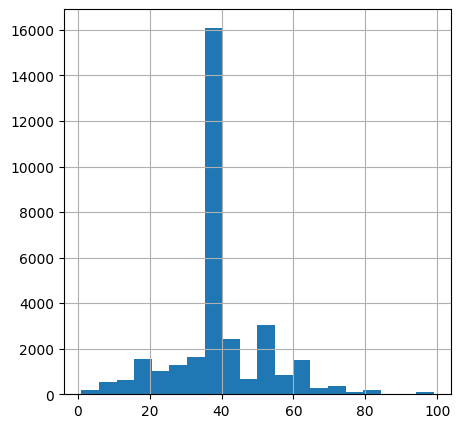

In [236]:
data['hours-per-week'].hist(figsize=(5,5), bins=20) # hist с опциональным аргументом bins для количества бинов гистограммы. 
plt.show()

Постройте гистограмму для значений возраста. Есть ли однозначный пик у этого распределения?

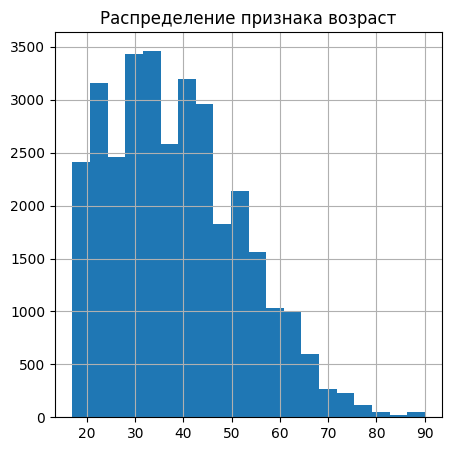

Однозначного пика у этого распределения нет


In [241]:
# You code here
data['age'].hist(figsize=(5,5), bins=20)
plt.title("Распределение признака возраст")
plt.show()
print(f'Однозначного пика у этого распределения нет')

12. Посмотрим на более детальную гистограмму, используя [sns.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) из библиотеки seaborn

In [242]:
import seaborn as sns

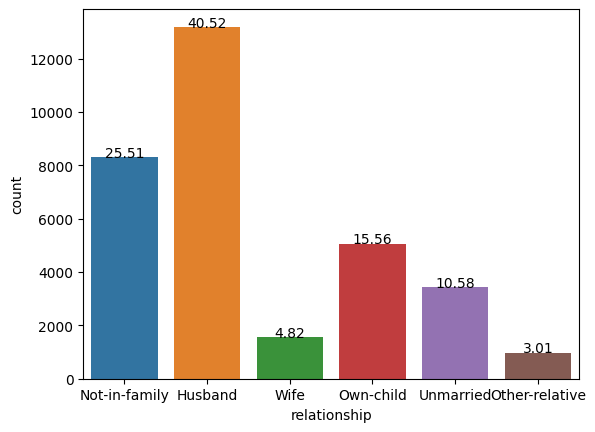

In [243]:
total = float(len(data))

ax = sns.countplot(x="relationship", data=data) # число наблюдений для каждого категориального значения
for p in ax.patches:
    height = p.get_height() # количество наблюдений в категории
    ax.text(p.get_x() + p.get_width() / 2., 
            height + 3,
            '{:1.2f}'.format((height/total) * 100), # создадим подпись в процентах от общего числа наблюдений
            ha="center") 
plt.show()


Постройте подобный график для колонки `workclass` и `education`. Какие выводы можно сделать, глядя на эти графики?

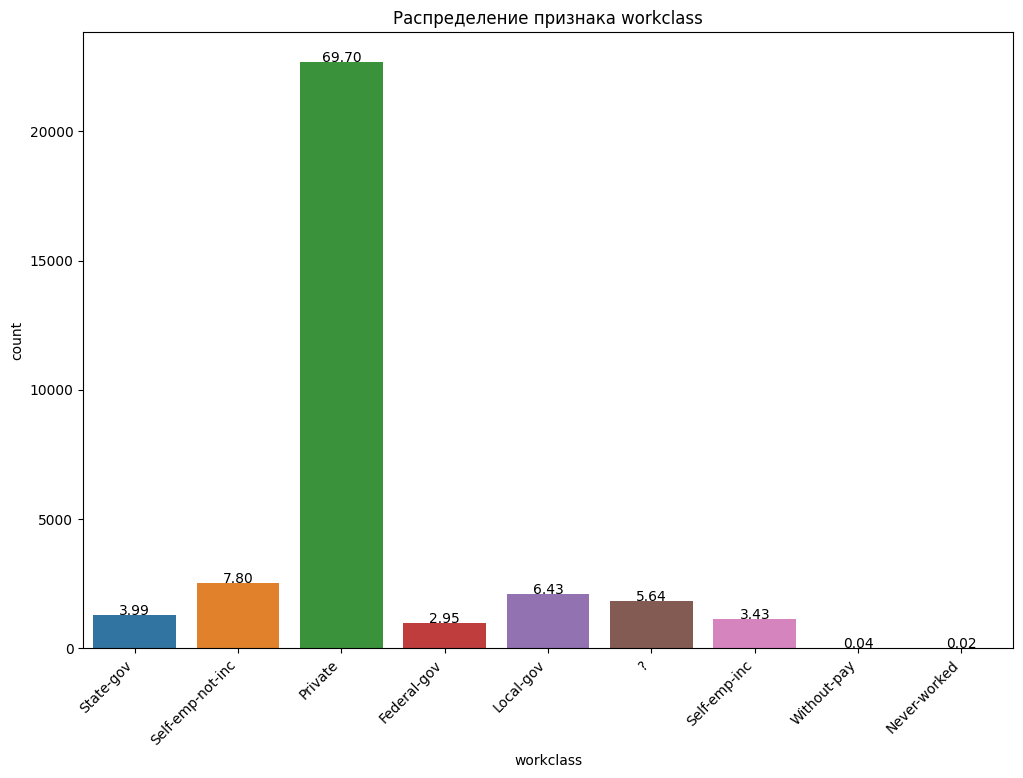

Наблюдается однозначный пик у этого распределения - Private


In [266]:
# You code here
total = float(len(data))
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='workclass', data=data) # число наблюдений для каждого категориального значения
for p in ax.patches:
    height = p.get_height() # количество наблюдений в категории
    ax.text(p.get_x() + p.get_width() / 2., 
            height + 3,
            '{:1.2f}'.format((height/total) * 100), # создадим подпись в процентах от общего числа наблюдений
            ha="center") 
labels = ax.get_xticklabels()
plt.setp(labels, rotation = 45, horizontalalignment = 'right')
plt.title("Распределение признака workclass")
plt.show()
print(f'Наблюдается однозначный пик у этого распределения - Private')

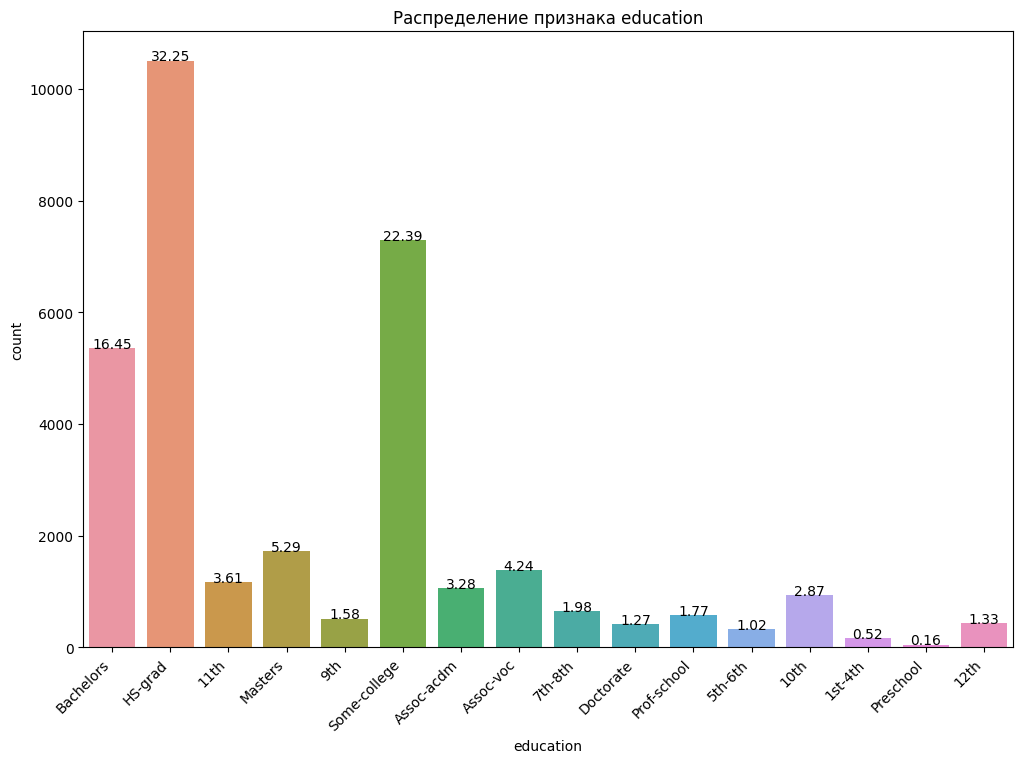

Наиболее часто в наших данных встречаются высшее образование, колледж или бакалавриат


In [265]:
# You code here
total = float(len(data))
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='education', data=data) # число наблюдений для каждого категориального значения
for p in ax.patches:
    height = p.get_height() # количество наблюдений в категории
    ax.text(p.get_x() + p.get_width() / 2., 
            height + 3,
            '{:1.2f}'.format((height/total) * 100), # создадим подпись в процентах от общего числа наблюдений
            ha="center") 
plt.title("Распределение признака education")
labels = ax.get_xticklabels()
plt.setp(labels, rotation = 45, horizontalalignment = 'right')
plt.show()
print(f'Наиболее часто в наших данных встречаются высшее образование, колледж или бакалавриат')